In [11]:

#importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [12]:
df_usa = df[df["job_country"] == "United States"]
df_usa["job_posted_month"] = df_usa['job_posted_date'].dt.strftime('%B')
df_usa_pivot.reset_index(inplace=True)
df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [14]:
df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot["job_posted_month"], format='%B').dt.month
df_usa_pivot.sort_values('month_no', inplace=True)
df_usa_pivot.set_index('job_posted_month',inplace=True)

df_usa_pivot.drop(columns='month_no',inplace= True)

<Axes: xlabel='job_posted_month'>

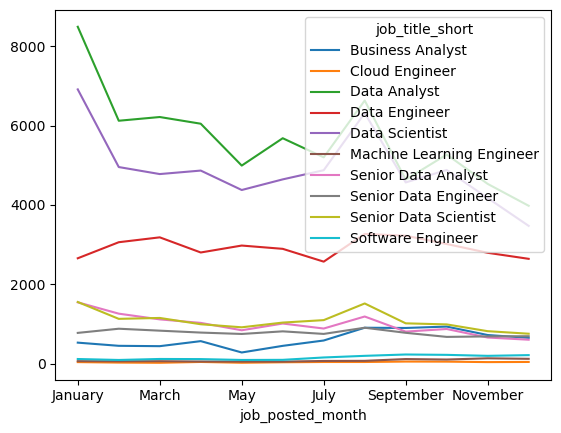

In [27]:
df_usa_pivot.plot(kind = 'line')

In [38]:
top_3 = df_usa['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()

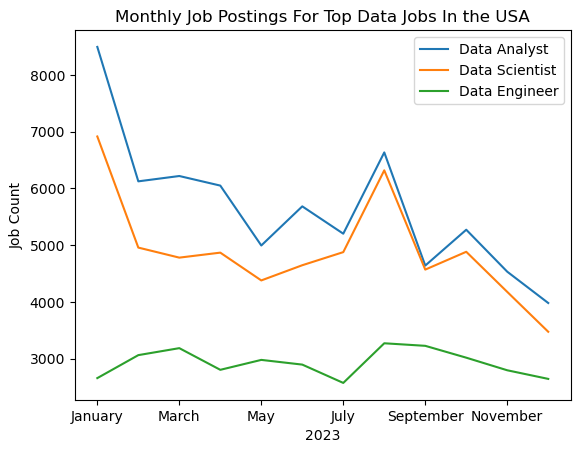

In [41]:
df_usa_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings For Top Data Jobs In the USA')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()
